In [ ]:
!pip install calmap

In [ ]:
!pip install wget

In [ ]:

### importamos librerías

'''
Antes instalar:
- calmap
- wget
'''

#analisis
import pandas as pd 
import numpy as np

#visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import calmap
import folium

#paletas
confirmados='#393e46'
fallecidos='#ff2e63'

import wget
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Database = "/content/drive/MyDrive/Colab Notebooks/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).zip (Unzipped Files)/Trade_DetailedTradeMatrix_E_All_Data_(Normalized).csv"

Database_CropsLivestock = "/content/drive/MyDrive/Colab Notebooks/Trade_CropsLivestock_E_All_Data_(Normalized).zip (Unzipped Files)/Trade_CropsLivestock_E_All_Data_(Normalized).csv"

In [ ]:
%%time

df = pd.read_csv(Database, encoding = "ISO-8859-1")

 #  Triga uns 2 minus en llegir-se

CPU times: user 55.9 s, sys: 22.9 s, total: 1min 18s
Wall time: 1min 38s


In [ ]:
df.shape

(41451253, 13)

In [ ]:
%%time
df_CropsLivestock = pd.read_csv(Database_CropsLivestock, encoding = "ISO-8859-1")

#  Triga uns 40 segons en llegir-se

CPU times: user 17.9 s, sys: 32.5 s, total: 50.4 s
Wall time: 53.9 s


In [ ]:
df_CropsLivestock.shape

(17384700, 11)

# Análisis Univariante de las bases de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41451253 entries, 0 to 41451252
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Reporter Country Code  int64  
 1   Reporter Countries     object 
 2   Partner Country Code   int64  
 3   Partner Countries      object 
 4   Item Code              int64  
 5   Item                   object 
 6   Element Code           int64  
 7   Element                object 
 8   Year Code              int64  
 9   Year                   int64  
 10  Unit                   object 
 11  Value                  float64
 12  Flag                   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 4.0+ GB


In [ ]:
# Miramos el número de países que hay en la base de datos

len(df[["Reporter Country Code","Reporter Countries"]].drop_duplicates())

179

Parecen pocos. ¿Hay agrupaciones?

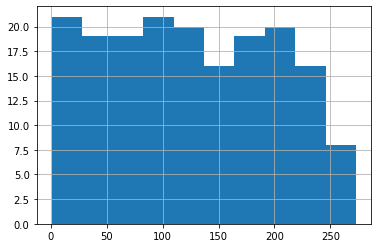

In [ ]:
df["Reporter Country Code"].drop_duplicates().hist()

No lo parece. Hacemos un head.

In [ ]:
df[["Reporter Country Code","Reporter Countries"]].drop_duplicates().head(160).tail(20)

,Reporter Country Code,Reporter Countries
30662921,194,Saudi Arabia
30905345,195,Senegal
31025458,272,Serbia
31194845,186,Serbia and Montenegro
31234793,196,Seychelles
31317911,197,Sierra Leone
31341653,200,Singapore
31992713,199,Slovakia
32240291,198,Slovenia
32556331,25,Solomon Islands


- Hemos visualizado todos los países y no hay agrupaciones por países. 

In [ ]:
pais = "Spain"
pais not in df["Reporter Countries"].unique()

False

In [ ]:
def lee_df_pais(df, pais):
  if pais not in df["Reporter Countries"].unique():
    print("Este país no existe en la base de datos")
    return ''
  else:
    return df[ df["Reporter Countries"]==pais]

In [ ]:
df_Spain = lee_df_pais(df, "Spain")

In [ ]:
##  Para leerla a trozos se podría hacer lo siguiente o también por país:

#df = pd.read_csv(Database, encoding = "ISO-8859-1", chunksize=1000000)
# for chunk in df_chunk:                                                 #  o podríamos chunk_df = next(df)
#    df_chunk.info()

In [ ]:
df_Spain

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
33218993,203,Spain,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2005,2005,tonnes,116.0,NaN
33218994,203,Spain,2,Afghanistan,231,Almonds shelled,5622,Import Value,2005,2005,1000 US$,778.0,NaN
33218995,203,Spain,2,Afghanistan,221,"Almonds, with shell",5610,Import Quantity,2004,2004,tonnes,18.0,NaN
33218996,203,Spain,2,Afghanistan,221,"Almonds, with shell",5610,Import Quantity,2005,2005,tonnes,36.0,NaN
33218997,203,Spain,2,Afghanistan,221,"Almonds, with shell",5622,Import Value,2004,2004,1000 US$,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34225520,203,Spain,181,Zimbabwe,564,Wine,5922,Export Value,2001,2001,1000 US$,8.0,NaN
34225521,203,Spain,181,Zimbabwe,564,Wine,5922,Export Value,2009,2009,1000 US$,4.0,NaN
34225522,203,Spain,181,Zimbabwe,564,Wine,5922,Export Value,2013,2013,1000 US$,0.0,NaN
34225523,203,Spain,181,Zimbabwe,564,Wine,5922,Export Value,2016,2016,1000 US$,13.0,NaN


Miramos si tenemos agrupaciones en los Items


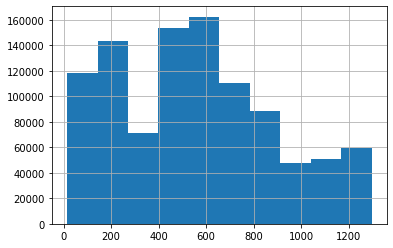

In [ ]:
#  df_chunk["Item Code"].hist()

df_Spain["Item Code"].hist()

In [ ]:
df_Spain[["Item Code","Item"]].sort_values("Item Code").drop_duplicates().head(10)

,Item Code,Item
33436796,15,Wheat
33286295,16,"Flour, wheat"
33521852,17,"Bran, wheat"
33289775,18,Macaroni
33693624,20,Bread
33327172,22,Pastry
34176745,27,"Rice, paddy"
33251612,28,"Rice, husked"
33762836,30,"Rice, paddy (rice milled equivalent)"
33927523,31,"Rice, milled"


- No hay tampoco agrupaciones en los Items.
- He comprobado que los Items son los mismos que aparecen en la Trade_Crops_Livestock, con lo cual podríamos llegar a usar las agrupaciones que allí hacen.


# EDA

### Productos más exportados de un país en los últimos años



In [ ]:
pais = "Spain"



## Mapas con los productos más importados y los países de los que proceden

Buscamos las países a los que más exporta y de los que más importa cada uno de los países.

In [ ]:
## La función de a continuación debería pintar in mapa pero no pinta nada. He probado varias estrategias pero nada. En celdas siguientes lo hago sin la función.

pais = "Spain"
año = 2019
def pinta_paises_top_exportaciones(df, pais, año, top_n=10):
  df_pais = lee_df_pais(df, pais)
  if type(df_pais) == str:
    return ''

  df_pais_año = df_pais[(df_pais["Element"] == "Export Quantity") & (df_pais["Year"] == año)]   # filtramos el año y el elemento
  
  serie_paises = df_pais_año.groupby("Partner Countries")["Value"].sum().sort_values().tail(top_n).reset_index()

  fig = px.bar(serie_paises.reset_index(), 
             x="Value", y="Partner Countries", title='Toneladas de comida exportadas', text='Value', orientation='h', 
             width=700, height=700, range_x = [0, max(serie_paises["Value"])+10000000])
  fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')
  plt.show()
  #mapa_global2 = folium.Map(location=[0, 0], min_zoom=1, max_zoom=4, zoom_start=1)
  return fig

#  return serie_paises
fig = pinta_paises_top_exportaciones(df, pais, año)
plt.show()
#serie_paises = pinta_paises_top_exportaciones(df, pais, año)
#serie_paises

In [ ]:
pais = "Spain"
año = 2019
top_n=15

df_pais = lee_df_pais(df, pais)
if type(df_pais) != str:
  df_pais_año = df_pais[(df_pais["Element"] == "Export Quantity") & (df_pais["Year"] == año)]   # filtramos el año y el elemento

  serie_paises = df_pais_año.groupby("Partner Countries")["Value"].sum().sort_values().tail(top_n).reset_index()




In [ ]:
fig = px.bar(serie_paises.reset_index(), 
            x="Value", y="Partner Countries", title='Toneladas de comida exportadas', text='Value', orientation='h', 
            width=700, height=700, range_x = [0, max(serie_paises["Value"])*1.4])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')

In [ ]:
serie_paises

,Partner Countries,Value
0,Romania,383304.0
1,Sweden,418994.0
2,Morocco,423942.0
3,United Arab Emirates,626697.0
4,United States of America,705577.0
5,Libya,871667.0
6,Belgium,888075.0
7,Poland,945232.0
8,"China, mainland",1208530.0
9,Netherlands,1794879.0


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Worldmap for countries population in 2016")
latitude = []
long = []
for i in serie_paises["Partner Countries"]:
    if i != None:
        location = geolocator.geocode(i)
        if location!=None:
            latitude.append(location.latitude)#, location.longitude)
            long.append(location.longitude)
        else:
            latitude.append(float("Nan"))#, location.longitude)
            long.append(float("Nan"))
    else:
        latitude.append(float("Nan"))#, location.longitude)
        long.append(float("Nan"))

In [ ]:
serie_paises["Lat"] = latitude
serie_paises["Long"] = long


In [ ]:
serie_paises.head()

,Partner Countries,Value,Lat,Long
0,Romania,383304.0,45.985213,24.685923
1,Sweden,418994.0,59.674971,14.520858
2,Morocco,423942.0,31.172821,-7.336248
3,United Arab Emirates,626697.0,24.000249,53.999483
4,United States of America,705577.0,39.783730,-100.445882


In [ ]:

'''
Mapa con círculos rojos de casos confirmados,
en este caso basta con pasar por el ratón para que se muestre la información
'''

##   el min_zoom i max_zoom marca el mínim i màxim 

# Aquesta vegada fem el for amb un range() per recorrer el dataframe.
## I farem el volum del cercle que sigui proporcional al número de confirmats. Paràmetre: radius
#  Paràmetre tooltip: és el que es mostrarà quan passi el ratolí per sobre.

## Oju al camp color: són colors amb format HEX. Aquí pots trobar els codis de colors HEX  https://htmlcolorcodes.com/

mapa_global2 = folium.Map(location=[0, 0], min_zoom=2, max_zoom=4, zoom_start=2)

for i in range(0, len(serie_paises)):
    folium.Circle(
        location=[serie_paises.iloc[i]['Lat'], serie_paises.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(serie_paises.iloc[i]['Partner Countries'])+
                    '<li><bold>Tones exported to : '+str(serie_paises.iloc[i]['Value'])
                    ,
        radius=int(serie_paises.iloc[i]['Value'])**0.75).add_to(mapa_global2)

mapa_global2

In [ ]:

mapa_global3 = px.choropleth(serie_paises, locations="Partner Countries", 
                    locationmode='country names', color="Value", 
                    hover_name="Partner Countries", range_color=[1,max(serie_paises["Value"])],  
                    color_continuous_scale=["Green","Yellow","Red"], 
                    title='Tones of food exported by '+pais)


mapa_global3.show()

In [ ]:
a = ''
type(a) == str


True

In [ ]:
del (a)

In [ ]:
def find_top_5_import(df):
  #aux = df.sort_values("Value", ascending = False).head(5)
  #aux["Partner Countries"] 
  a = df.sort_values("Value", ascending = False).head(5)
  c_list = a["Partner Countries"].unique()
#  print(c_list)
  a["top5countries"]=",".join(c_list)
  return a.head(1)

In [ ]:
gb_imp_val = a.groupby(["Year Code", "Reporter Countries","Partner Countries"])["Value"].sum().reset_index().sort_values(by=["Year Code", "Reporter Countries","Value"], ascending=False)

In [ ]:
gb_imp_val.groupby(["Year Code", "Reporter Countries"]).apply(find_top_5_import)["top5countries"].reset_index().drop("level_2", axis=1)
#for country in aux2[""]

In [ ]:
a.groupby(["Year Code", "Reporter Countries","Partner Countries"]).apply(lambda pd: pd.head()).head(20)

Paises de los que más han importado los paises en 2019

In [ ]:
b = df[(df["Element"] == "Import Quantity") & (df["Year"] == 2019)]
gb_imp_val_all = b.groupby(["Year Code", "Reporter Countries","Partner Countries"])["Value"].sum().reset_index().sort_values(by=["Year Code", "Reporter Countries","Value"], ascending=False)
c = gb_imp_val_all.groupby(["Year Code", "Reporter Countries"]).apply(find_top_5_import)["top5countries"].reset_index().drop("level_2", axis=1)

c.to_csv("/content/drive/MyDrive/Colab Notebooks/Importacion_paises.csv")


Paises a los que más exportan los paises

In [ ]:
b = df[(df["Element"] == "Export Quantity") & (df["Year"] == 2019)]
gb_imp_val_all = b.groupby(["Year Code", "Reporter Countries","Partner Countries"])["Value"].sum().reset_index().sort_values(by=["Year Code", "Reporter Countries","Value"], ascending=False)
c = gb_imp_val_all.groupby(["Year Code", "Reporter Countries"]).apply(find_top_5_import)["top5countries"].reset_index().drop("level_2", axis=1)

c.to_csv("/content/drive/MyDrive/Colab Notebooks/Exportacion_paises.csv")

# per llegir-lo:  a = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Exportacion_paises.csv", index_col=0)

# Exportación/Importacion de cada país por Continente

Crearemos un csv donde haya dos filas para cada país, y 5 columnas, una columna por continente. En cada columna habrá las toneladas de alimento exportadas por dicho país a ese continente (en una fila) y las toneladas importadas (en otra fila) 

## Importacion por contiente

HAremos una prueba primero sólo con España. Filtramos el dataset y nos quedamos sólo la información referente a las importaciones y exportaciones españolas.

A continuación, le añadiremos la información de continentes y calcularemos lo que importa y exporta a cada continente.

Luego haremos un bucle para todos los países

In [ ]:
df_Spain = lee_df_pais(df, "Spain")

In [ ]:
# Leemos un dataset con la correspondencia de pais y su continente

paises_grupos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Grupos Paises.csv')
paises_grupos.head(1)

,Código Grupo de países,Grupo de países,Código País,País,Código M49,Código ISO2,Código ISO3
0,5100,África,616,"África del Oeste, no especificado",NaN,NaN,NaN


In [ ]:
paises_continente["Grupo de países"].unique()

array(['África', 'Américas', 'Asia', 'Europa', 'Oceanía'], dtype=object)

In [ ]:
# Vamos a coger sólo los grupos de continente
continentes = ['África','Asia','Américas','Europa','Oceanía']

paises_continente = paises_grupos[paises_grupos["Grupo de países"].isin(continentes)]


In [ ]:
paises_continente.head(1)

,Código Grupo de países,Grupo de países,Código País,País,Código M49,Código ISO2,Código ISO3
0,5100,África,616,"África del Oeste, no especificado",NaN,NaN,NaN


In [ ]:
paises_continente["Grupo de países"].value_counts()

África      64
Europa      63
Américas    61
Asia        55
Oceanía     35
Name: Grupo de países, dtype: int64

In [ ]:
df_Spain.head(1)

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
33218993,203,Spain,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2005,2005,tonnes,116.0,NaN


In [ ]:
paises_continente[["Código País", "Código Grupo de países","Grupo de países"]].head(1)

,Código País,Código Grupo de países,Grupo de países
0,616,5100,África


In [ ]:
paises_continente["Código País"].value_counts()

206    2
351    2
616    1
11     1
27     1
      ..
36     1
65     1
224    1
239    1
155    1
Name: Código País, Length: 276, dtype: int64

Hay dos países que se repiten... cuales son?

In [ ]:
paises_continente[paises_continente["Código País"].isin([206,351])]

,Código Grupo de países,Grupo de países,Código País,País,Código M49,Código ISO2,Código ISO3
55,5100,África,206,Sudán (ex),736.0,NaN,NaN
56,5100,África,206,Sudán (ex),736.0,SD,NaN
433,5300,Asia,351,China,NaN,NaN,CHN
434,5300,Asia,351,China,159.0,NaN,CHN


Estos dos países se repiten porque tienen diferentes informaciones en algunos códigos. Nos quedaremos sólo con una fila.

In [ ]:
paises_continente.drop([55,433], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
paises_continente.shape

(276, 7)

In [ ]:
print (df_Spain.shape)


(1006532, 13)


In [ ]:
print (df_Spain.shape)
df_Spain = pd.merge(df_Spain, paises_continente[["Código País", "Código Grupo de países","Grupo de países"]], left_on="Partner Country Code", right_on="Código País", how="left")
print (df_Spain.shape)

(1006532, 13)
(1006532, 16)


In [ ]:
df_Spain.head(1)

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Código País,Código Grupo de países,Grupo de países
0,203,Spain,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2005,2005,tonnes,116.0,NaN,2,5300,Asia


In [ ]:
df_Spain_2019_Import_Total

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Código País,Código Grupo de países,Grupo de países
332,203,Spain,2,Afghanistan,111,"Flour, cereals",5610,Import Quantity,2019,2019,tonnes,0.0,NaN,2,5300,Asia
363,203,Spain,2,Afghanistan,1232,Food prep nes,5610,Import Quantity,2019,2019,tonnes,0.0,NaN,2,5300,Asia
946,203,Spain,2,Afghanistan,561,Raisins,5610,Import Quantity,2019,2019,tonnes,350.0,NaN,2,5300,Asia
998,203,Spain,2,Afghanistan,723,Spices nes,5610,Import Quantity,2019,2019,tonnes,1.0,NaN,2,5300,Asia
1067,203,Spain,2,Afghanistan,667,Tea,5610,Import Quantity,2019,2019,tonnes,0.0,NaN,2,5300,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006069,203,Spain,181,Zimbabwe,507,Grapefruit (inc. pomelos),5610,Import Quantity,2019,2019,tonnes,40.0,NaN,181,5100,África
1006215,203,Spain,181,Zimbabwe,340,"Oil, vegetable origin nes",5610,Import Quantity,2019,2019,tonnes,0.0,NaN,181,5100,África
1006296,203,Spain,181,Zimbabwe,490,Oranges,5610,Import Quantity,2019,2019,tonnes,1313.0,NaN,181,5100,África
1006381,203,Spain,181,Zimbabwe,162,Sugar Raw Centrifugal,5610,Import Quantity,2019,2019,tonnes,19909.0,NaN,181,5100,África


In [ ]:
# Creamos un subgrupo con la cantidad de alimento importada en toneladas (no incluimos animales vivos), en el año 2019. El hecho de que incluir animales lo hacemos filtrando la columna "Unit" con el valor "tonnes". No se incluye "Heads" ni "1000 Heads"

df_Spain_2019_Import_Total = df_Spain[(df_Spain["Element"] == "Import Quantity") & (df_Spain["Year"] == 2019) & (df_Spain["Unit"] == "tonnes")]
df_Spain_Import_Total = df_Spain[(df_Spain["Element"] == "Import Quantity") & (df_Spain["Unit"] == "tonnes")]



In [ ]:
df_Spain_Import_Total.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Código País,Código Grupo de países,Grupo de países
0,203,Spain,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,2005,2005,tonnes,116.0,NaN,2,5300,Asia
2,203,Spain,2,Afghanistan,221,"Almonds, with shell",5610,Import Quantity,2004,2004,tonnes,18.0,NaN,2,5300,Asia
3,203,Spain,2,Afghanistan,221,"Almonds, with shell",5610,Import Quantity,2005,2005,tonnes,36.0,NaN,2,5300,Asia
7,203,Spain,2,Afghanistan,711,"Anise, badian, fennel, coriander",5610,Import Quantity,1996,1996,tonnes,25.0,NaN,2,5300,Asia
8,203,Spain,2,Afghanistan,711,"Anise, badian, fennel, coriander",5610,Import Quantity,1999,1999,tonnes,12.0,NaN,2,5300,Asia


,Reporter Country Code,Reporter Countries,Year Code,Grupo de países,Unit,Value
0,203,Spain,2019,Américas,tonnes,12716112.0
1,203,Spain,2019,Asia,tonnes,3213953.0
2,203,Spain,2019,Europa,tonnes,25957361.0
3,203,Spain,2019,Oceanía,tonnes,105706.0
4,203,Spain,2019,África,tonnes,1474748.0


In [ ]:
#gb_ = df_Spain_2019_Import_Total.groupby(["Reporter Country Code","Reporter Countries","Year Code","Grupo de países","Unit"])["Value"].sum().reset_index()
#gb_.pivot_table(index=["Reporter Country Code",	"Reporter Countries",	"Year Code"],columns=["Grupo de países"],values="Value",aggfunc="sum")
 # o también se puede hacer directamente con el pivot_table()

#df_Spain_2019_Import_Total.pivot_table(index=["Reporter Country Code",	"Reporter Countries",	"Year Code"],columns=["Grupo de países"],values="Value",aggfunc="sum")

df_Spain_Import_Total.pivot_table(index=["Reporter Country Code",	"Reporter Countries",	"Year Code"],columns=["Grupo de países"],values="Value",aggfunc="sum")



Grupo de países                                       Américas       Asia  \
Reporter Country Code Reporter Countries Year Code                          
203                   Spain              1986        5673072.0   521301.0   
                                         1987        5448122.0  1072261.0   
                                         1988        6854385.0  1009116.0   
                                         1989        6088079.0  1291151.0   
                                         1990        7493760.0  1541705.0   
                                         1991        7300277.0  1764004.0   
                                         1992        6565406.0  1957941.0   
                                         1993        7760357.0  2101100.0   
                                         1994        7736440.0  2299920.0   
                                         1995       10805235.0  1653288.0   
                                         1996        8125187.0  1758806.0   
                                         1997        7687445.0  1944328.0   
                                         1998        8683185.0  1843413.0   
                                         1999       10009101.0  2082185.0   
                                         2000        9671225.0  2511545.0   
                                         2001       10049124.0  2136050.0   
                                         2002       10010725.0  2118017.0   
                                         2003       11404906.0  2245776.0   
                                         2004       10809255.0  2310821.0   
                                         2005       11671265.0  1588101.0   
                                         2006       10794306.0  1513363.0   
                                         2007       16765027.0  1998844.0   
                                         2008       13915300.0  1958315.0   
                                         2009        7925665.0  1463707.0   
                                         2010        9128595.0  1475934.0   
                                         2011        9286572.0  1557906.0   
                                         2012        8112082.0  1634721.0   
                                         2013        8536025.0  2098680.0   
                                         2014        8567669.0  2306276.0   
                                         2015        8561629.0  2219180.0   
                                         2016        8743160.0  2426605.0   
                                         2017       11323763.0  3018042.0   
                                         2018       13437685.0  2933098.0   
                                         2019       12716112.0  3213953.0   
                                         2020       11123630.0  3174346.0   

Grupo de países                                         Europa   Oceanía  \
Reporter Country Code Reporter Countries Year Code                         
203                   Spain              1986        3258822.0   80338.0   
                                         1987        4850680.0   73077.0   
                                         1988        3076331.0  103747.0   
                                         1989        3793249.0  128880.0   
                                         1990        3692872.0   78721.0   
                                         1991        5776726.0  128605.0   
                                         1992        5569745.0  281096.0   
                                         1993        7348372.0  361654.0   
                                         1994        7692365.0  343223.0   
                                         1995        9151005.0  171574.0   
                                         1996        8754506.0  280881.0   
                                         1997        9288249.0  387719.0   
                                         1998       10315912.0  346147.0   
          

In [ ]:
df["Reporter Country Code"].unique()

array([  2,   3,   4,   8,   9,   1,  10,  11,  52,  12,  13,  16,  14,
        57, 255,  15,  23,  53,  18,  19,  80,  20,  21,  26,  27, 233,
        29,  35, 115,  32,  33,  37,  40,  96, 128,  41, 214,  44,  45,
        46,  47,  48, 107,  98,  49,  50, 167, 250,  54,  72,  55,  58,
        59,  60,  63, 209, 238,  62,  64,  66,  67,  68,  69,  70,  74,
        75,  73,  79,  81,  84,  86,  87,  89,  90,  91,  95,  97,  99,
       100, 101, 102, 104, 105, 106, 109, 110, 112, 108, 114,  83, 118,
       113, 119, 121, 124, 126, 256, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 141, 273, 143, 147, 149, 150, 153, 156, 157, 158,
       159, 154, 162, 221, 165, 166, 168, 169, 170, 171, 173, 174, 179,
       117, 146, 182, 183, 185, 184, 188, 189, 191, 193, 194, 195, 272,
       186, 196, 197, 200, 199, 198,  25, 202, 203,  38, 206, 207, 210,
       211, 212, 216, 217, 219, 220, 222, 223, 227, 226, 230, 225, 229,
       215, 231, 234, 228, 155, 236, 249, 248, 251, 181])

In [ ]:
#(df_Spain["Element"] == "Import Quantity") & (df_Spain["Unit"] == "tonnes")

pais = 203
df_pais = df[(df["Reporter Country Code"]==pais) & (df["Element"] == "Import Quantity") & (df["Unit"] == "tonnes")]
print(pais)
  #print (df.shape)
  
df_continent = pd.merge(df_pais, paises_continente[["Código País", "Código Grupo de países","Grupo de países"]], left_on="Partner Country Code", right_on="Código País", how="left")
df_continent.pivot_table(index=["Reporter Country Code",	"Reporter Countries",	"Year Code"],columns=["Grupo de países"],values="Value",aggfunc="sum").reset_index()

203


Grupo de países,Reporter Country Code,Reporter Countries,Year Code,Américas,Asia,Europa,Oceanía,África
0,203,Spain,1986,5673072.0,521301.0,3258822.0,80338.0,323234.0
1,203,Spain,1987,5448122.0,1072261.0,4850680.0,73077.0,246929.0
2,203,Spain,1988,6854385.0,1009116.0,3076331.0,103747.0,275741.0
3,203,Spain,1989,6088079.0,1291151.0,3793249.0,128880.0,283955.0
4,203,Spain,1990,7493760.0,1541705.0,3692872.0,78721.0,370228.0
5,203,Spain,1991,7300277.0,1764004.0,5776726.0,128605.0,406468.0
6,203,Spain,1992,6565406.0,1957941.0,5569745.0,281096.0,474854.0
7,203,Spain,1993,7760357.0,2101100.0,7348372.0,361654.0,433011.0
8,203,Spain,1994,7736440.0,2299920.0,7692365.0,343223.0,580621.0
9,203,Spain,1995,10805235.0,1653288.0,9151005.0,171574.0,566456.0


Hacemos el bucle para todos los países. Primero las importaciones y luego las exportaciones.

In [ ]:
%%time

ELEMENTO = "Import Quantity"
for pais in df["Reporter Country Code"].unique()[0:1]:
  df_pais = df[(df["Reporter Country Code"]==pais)]
  df_imp = df_pais[df_pais["Element"]==ELEMENTO]
  df_pais = df_imp[df_imp["Unit"] == "tonnes"]
  
  df_continent = pd.merge(df_pais, paises_continente[["Código País", "Código Grupo de países","Grupo de países"]], left_on="Partner Country Code", right_on="Código País", how="left")
  aux = df_continent.pivot_table(index=["Reporter Country Code",	"Reporter Countries",	"Year Code"],columns=["Grupo de países"],values="Value",aggfunc="sum").reset_index()

for pais in df["Reporter Country Code"].unique()[1:]:
  df_pais = df[(df["Reporter Country Code"]==pais)]
  df_imp = df_pais[df_pais["Element"]==ELEMENTO]
  df_pais = df_imp[df_imp["Unit"] == "tonnes"]

  df_continent = pd.merge(df_pais, paises_continente[["Código País", "Código Grupo de países","Grupo de países"]], left_on="Partner Country Code", right_on="Código País", how="left")
  aux2 = df_continent.pivot_table(index=["Reporter Country Code",	"Reporter Countries",	"Year Code"],columns=["Grupo de países"],values="Value",aggfunc="sum").reset_index()
  aux = pd.concat([aux, aux2])

aux["Element"]=ELEMENTO

df_Import_Export = aux.copy()



CPU times: user 41.8 s, sys: 1.46 s, total: 43.3 s
Wall time: 36.2 s


In [ ]:
df_Import_Export.head()

Grupo de países,Reporter Country Code,Reporter Countries,Year Code,Américas,Asia,Europa,Oceanía,África,Element
0,2,Afghanistan,2009,42795.0,1249016.0,129430.0,151.0,3324.0,Import Quantity
1,2,Afghanistan,2010,89333.0,1117140.0,29063.0,757.0,13314.0,Import Quantity
2,2,Afghanistan,2011,63995.0,1150962.0,14128.0,816.0,31800.0,Import Quantity
3,2,Afghanistan,2014,65068.0,3345901.0,49020.0,176.0,76.0,Import Quantity
4,2,Afghanistan,2015,66864.0,4935864.0,51525.0,222.0,59.0,Import Quantity


In [ ]:
# Comprobamos que el resultado da igual para España
aux[aux["Reporter Countries"]=="Spain"]

In [ ]:
%%time

ELEMENTO = "Export Quantity"
for pais in df["Reporter Country Code"].unique()[0:1]:
  df_pais = df[(df["Reporter Country Code"]==pais)]
  df_imp = df_pais[df_pais["Element"]==ELEMENTO]
  df_pais = df_imp[df_imp["Unit"] == "tonnes"]
  
  df_continent = pd.merge(df_pais, paises_continente[["Código País", "Código Grupo de países","Grupo de países"]], left_on="Partner Country Code", right_on="Código País", how="left")
  aux = df_continent.pivot_table(index=["Reporter Country Code",	"Reporter Countries",	"Year Code"],columns=["Grupo de países"],values="Value",aggfunc="sum").reset_index()

for pais in df["Reporter Country Code"].unique()[1:]:
  df_pais = df[(df["Reporter Country Code"]==pais)]
  df_imp = df_pais[df_pais["Element"]==ELEMENTO]
  df_pais = df_imp[df_imp["Unit"] == "tonnes"]

  df_continent = pd.merge(df_pais, paises_continente[["Código País", "Código Grupo de países","Grupo de países"]], left_on="Partner Country Code", right_on="Código País", how="left")
  aux2 = df_continent.pivot_table(index=["Reporter Country Code",	"Reporter Countries",	"Year Code"],columns=["Grupo de países"],values="Value",aggfunc="sum").reset_index()
  aux = pd.concat([aux, aux2])

aux["Element"]=ELEMENTO


CPU times: user 42 s, sys: 1.51 s, total: 43.5 s
Wall time: 38.9 s


In [ ]:
aux.head()

Grupo de países,Reporter Country Code,Reporter Countries,Year Code,Américas,Asia,Europa,Oceanía,África,Element
0,2,Afghanistan,2009,13894.0,177099.0,17560.0,4.0,22.0,Export Quantity
1,2,Afghanistan,2010,1593.0,157768.0,26264.0,349.0,1420.0,Export Quantity
2,2,Afghanistan,2011,828.0,95976.0,19502.0,35.0,0.0,Export Quantity
3,2,Afghanistan,2014,829.0,317028.0,15310.0,929.0,2448.0,Export Quantity
4,2,Afghanistan,2015,832.0,590719.0,10128.0,580.0,730.0,Export Quantity


In [ ]:
print(aux.shape)
print(df_Import_Export.shape)

df_Import_Export = pd.concat([df_Import_Export, aux])
print(df_Import_Export.shape)


(4290, 9)
(4332, 9)
(8622, 9)


In [ ]:
# Lo guardo para poder recuperarlo desde otro Notebook, el del clustering

df_Import_Export.to_pickle("df_Import_Export_Continentes.pkl")